## Load libraries


In [29]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.optimizers import Adam
import matplotlib.pyplot as plt


## load the data 

In [22]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()


## Preprocessing

In [ ]:
# print(y_train[0])
y_train = to_categorical(y_train)

y_test = to_categorical(y_test)
# print(y_train[0])


[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## Build Architecture

In [33]:
model = Sequential()
model.add(Conv2D(8,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(units = 128, activation =  'relu'))
model.add(Dense(units = 10, activation = 'softmax'))


d:\22EG107C44\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Compile

In [34]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])


## Train

In [39]:
result = model.fit(X_train,y_train,epochs=32,batch_size=64, validation_data= (X_test,y_test))

Epoch 1/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.4039 - loss: 1.6004 - val_accuracy: 0.4424 - val_loss: 1.5444
Epoch 2/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.4582 - loss: 1.4758 - val_accuracy: 0.4419 - val_loss: 1.5023
Epoch 3/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.4959 - loss: 1.3798 - val_accuracy: 0.4838 - val_loss: 1.4491
Epoch 4/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.5240 - loss: 1.3240 - val_accuracy: 0.5155 - val_loss: 1.3634
Epoch 5/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5428 - loss: 1.2826 - val_accuracy: 0.5191 - val_loss: 1.3556
Epoch 6/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.5541 - loss: 1.2421 - val_accuracy: 0.5321 - val_loss: 1.3171
Epoch 7/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.5638 - loss: 1.2301 - val_accuracy: 0.5170 - val_loss: 1.3513
Epoch 8/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5684 - loss: 1.2105 - v

## Evaluate

In [40]:
loss , accuracy = model.evaluate(X_test,y_test)
print(f"test accuracy:{accuracy}, test loss: {loss} ")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5694 - loss: 1.3448
test accuracy:0.5629000067710876, test loss: 1.365007996559143 


## Visualization

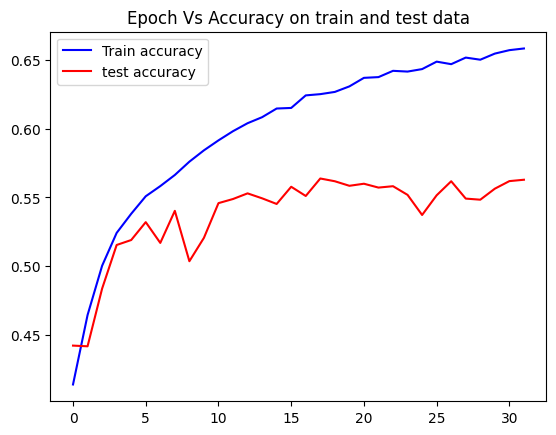

In [42]:
plt.plot(result.history['accuracy'],label='Train accuracy', color='blue')
plt.plot(result.history['val_accuracy'], label='test accuracy',color ='red')
plt.legend()
plt.title("Epoch Vs Accuracy on train and test data")
plt.show()

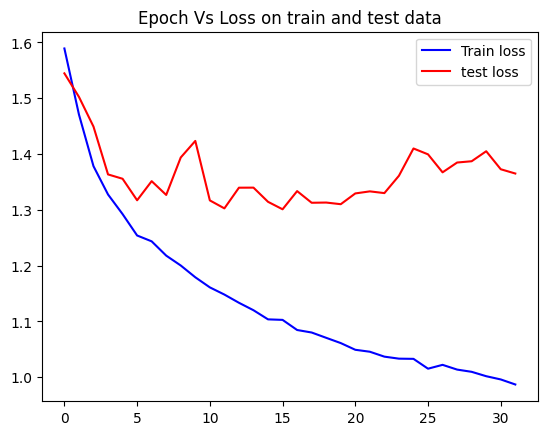

In [44]:
plt.plot(result.history['loss'],label='Train loss', color='blue')
plt.plot(result.history['val_loss'], label='test loss',color='red')
plt.legend()
plt.title("Epoch Vs Loss on train and test data")
plt.show()